In [1]:
# nacteni knihoven
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_folder = "./mouse/"
ref_img_file = "ref.bmp"
file_list = "FileList.txt"

test_img_file = "Basler_daA1280-54uc__23870396__20240430_134640064_0078.tiff"

In [57]:
Y_RANGE = (550, 750)
X_RANGE = (400, 900)

In [64]:
def preproces_image(img_path, y_range = Y_RANGE, x_range = X_RANGE, threshold = 220):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img_croped = img[y_range[0]:y_range[1], x_range[0]:x_range[1]]
    img_croped_hsv = cv2.cvtColor(img_croped, cv2.COLOR_RGB2HSV)
    value = img_croped_hsv[:, :, 2]
    R_trasholded = value
    R_trasholded[R_trasholded < threshold] = 0
    return R_trasholded

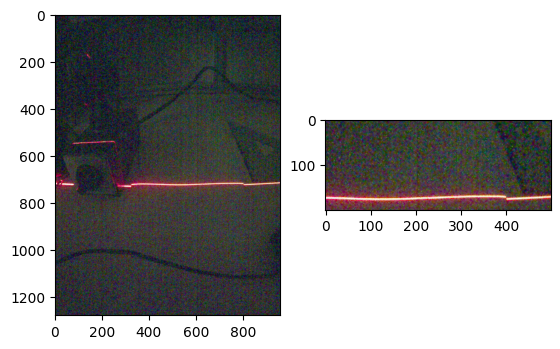

In [59]:
# nacti referencni obrazek
ref_img = cv2.imread(data_folder + ref_img_file, cv2.IMREAD_COLOR)
# BGR to RGB
ref_img = cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB)

# otoceni obrazku o 90 stupnu
ref_img = cv2.rotate(ref_img, cv2.ROTATE_90_CLOCKWISE)

# crop obrazku
y_range = Y_RANGE
x_range = X_RANGE
ref_crop = ref_img[y_range[0]:y_range[1], x_range[0]:x_range[1]]

# zobraz obrazek
# dva grafy vedle sebe
plt.subplot(1, 2, 1)
plt.imshow(ref_img)
plt.subplot(1, 2, 2)
plt.imshow(ref_crop)

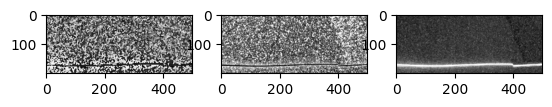

In [60]:
# to HSV
ref_hsv = cv2.cvtColor(ref_crop, cv2.COLOR_RGB2HSV)

# zobrazime histogram
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(ref_hsv[:, :, 0], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(ref_hsv[:, :, 1], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(ref_hsv[:, :, 2], cmap='gray')

In [67]:
def get_siluet(img_red_value):
    siluet = np.argmax(img_red_value, axis=0)
    return siluet

(0.0, 255.0)

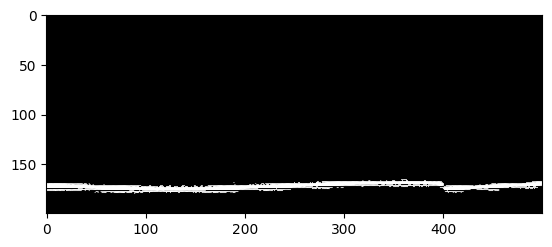

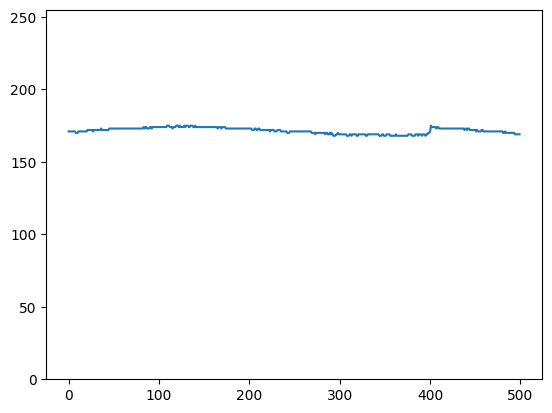

In [62]:
# vybrání R slozky
ref_r = ref_hsv[:, :, 2]

# value < 100 = 0
value = 200
R_trasholded = ref_r.copy()
R_trasholded[ref_r < value] = 0
plt.figure()
plt.imshow(R_trasholded, cmap='gray')

# pozice maxima ve sloupci
max_column = np.argmax(R_trasholded, axis=0)
plt.figure()
plt.plot(max_column)
# y values 0 to 255
plt.ylim(0, 255)


In [119]:
def custom_opening(img, kernel1=np.ones((2, 6), np.uint8), kernel2=np.ones((1, 3), np.uint8), repetitions = 3):
    kernel1 = np.ones((2, 6), np.uint8)
    kernel2 = np.ones((1, 3), np.uint8)
    for i in range(repetitions):
        img = cv2.dilate(img, kernel1, iterations=1)
        img = cv2.erode(img, kernel2, iterations=1)
    return img

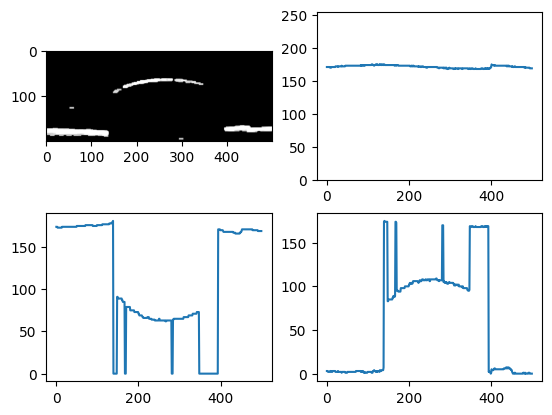

In [117]:
# nacti testovaci laserovy snimek
test_img = cv2.imread(data_folder + test_img_file, cv2.IMREAD_COLOR)
preprocesed_image = preproces_image(data_folder + test_img_file, threshold=180)
kernel1 = np.ones((2, 6), np.uint8)
kernel2 = np.ones((1, 3), np.uint8)
preprocesed_image = custom_opening(preprocesed_image, kernel1, kernel2)

# 4 grafy vedle sebe
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(preprocesed_image, cmap='gray')

# zjisteni siluety
silueta = get_siluet(preprocesed_image)

plt.subplot(2, 2, 2)
plt.plot(max_column)
plt.ylim(0, 255)

plt.subplot(2, 2, 3)
plt.plot(silueta)

mouse = abs(silueta - max_column)
plt.subplot(2, 2, 4)
plt.plot(mouse)

In [84]:
# print lines of file list
def read_file_list(file_list):
    with open(data_folder + file_list, 'r') as f:
        lines = f.readlines()
        lines = [x.strip() for x in lines]
    return lines

lines = read_file_list(file_list)
for line in lines:
    print(line)

Basler_daA1280-54uc__23870396__20240430_134640064_0000.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0001.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0002.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0003.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0004.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0005.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0006.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0007.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0008.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0009.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0010.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0011.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0012.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0013.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0014.tiff
Basler_daA1280-54uc__23870396__20240430_134640064_0015.tiff
Basler_daA1280-54uc__23870396__20240430_

In [129]:
# nacti obrazky
siluet_lines = []
threshold = 160
for img_path in read_file_list(file_list):
    preprocesed_image = preproces_image(data_folder + img_path, threshold=threshold)
    preprocesed_image = custom_opening(preprocesed_image)
    silueta = get_siluet(preprocesed_image)
    mouse = abs(silueta - max_column)
    mouse = np.array(np.clip(mouse, 0, 255))
    mouse[mouse > 100] = 0
    siluet_lines.append(mouse)

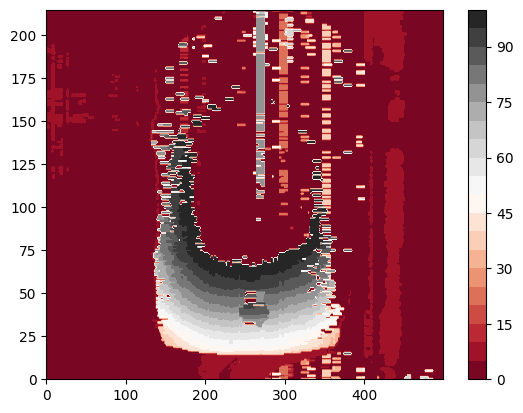

In [130]:
# meshgrid
X, Y = np.meshgrid(range(len(siluet_lines[0])), range(len(siluet_lines)))

# zobrazime
plt.figure()
plt.contourf(X, Y, siluet_lines, 20, cmap='RdGy')
plt.colorbar()
plt.show()

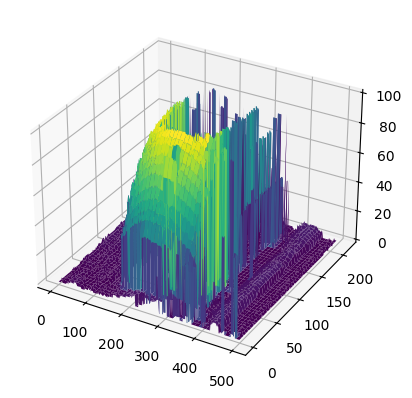

In [131]:
# plot 3D
# siluet_lines to np.array
siluet_lines = np.array(siluet_lines)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, siluet_lines, cmap='viridis')
plt.show()